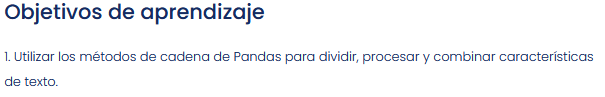

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vReZBM5OC6GLYbacisp_ToNiu3CLWxqPXw7mWBsdRjnYOFLWNufdQ4qd8u5qTzUF2_sBUAMEi5cgy1U/pub?gid=1040198428&single=true&output=csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Características de separación: cadenas

Pandas también contiene métodos de cadenas que se pueden aplicar a columnas enteras, estas son accesibles al poner .str antes de los métodos comunes de cadenas.  Por ejemplo, digamos que queremos separar columnas para los primeros y últimos nombres.  Podemos utilizar .str.split().  Por defecto se separará en un espacio blanco y reemplazará las cadenas por listas.  Al agregar algunos argumentos, podemos separar en comas y ampliar el resultado en columnas separadas.  El primer argumento en el método Series.str.split() es el separador para dividir. expand=True devuelve 2 columnas nuevas en lugar de una columna con una lista de cadenas.

In [4]:
# create 2 new columns, FirstName and LastName by splitting the Name column
df[['LastName','FirstName']] = df['Name'].str.split(',', expand=True)
# drop the 'Name' column
df.drop('Name', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


##Limpieza

Una cosa que necesitamos abordar es un poco de la suciedad en nuestros datos de la última operación.  Separamos la cadena “Name” en la coma, no el espacio blanco, por lo que el espacio blanco se quedó en la cadena.

In [5]:
df.loc[0,'FirstName']

' Mr. Owen Harris'

Limpiemos esa columna con otro método de cadena de Pandas, Series.str.strip().  Esto elimina el espacio blanco del frente y detrás de todas las cadenas en una columna.

In [6]:
df['FirstName'] = df['FirstName'].str.strip()
df.loc[0, 'FirstName']

'Mr. Owen Harris'

##Combinar cadenas

También podemos combinar cadenas.  Tal vez hayamos decidido que en lugar de “Last Name, First Name” queríamos que el formato de nuestra columna “Name” fuera “First Name Last Name”.  Podemos utilizar el operador “+” para combinarlas en orden inverso al original y dejar la coma fuera.  Sin embargo, queremos un espacio entre ellos, así que agregaremos eso también.

In [7]:
df['Name'] = df['FirstName'] + ' ' + df['LastName']
df.drop(columns=['LastName','FirstName'], inplace= True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris Braund
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina Heikkinen
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry Allen


## Resumen

Los métodos de cadena de Pandas nos permiten manipular los datos de texto para combinar características o crear nuevas.